In [1]:
from greedy_mcmc_attack import *
from data_collection.recordings import *
import sys
sys.path.append("../../")
from src.models.gcn import *
from src.models.gat import *
from src.models.gsage import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# dataset_directory = "../Cora"
cora_dataset = Planetoid(root='', name='Citeseer')
data = cora_dataset[0].to(device)
print(data)

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])


In [4]:
edges_to_add = None

In [5]:
model = GAT(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)

In [6]:
model_save_path = "../models/citeseer_gat_model.pth"
list_save_path = "../attacks/citeseer_gat_edges.pth"
# # multi_metattack_edges_list.pth
# list_save_path = "multi_metattack_edges_list.pth"

In [7]:
model, edges_to_add, train = load_model_and_edges(model_save_path, list_save_path, model, device)

In [8]:
# Get initial accuracy
initial_loss, initial_accuracy = train.test(data)
print(f"Initial Accuracy: {initial_accuracy}")
print(f"Initial Loss: {initial_loss}")

Initial Accuracy: 0.669
Initial Loss: 1.6974281072616577


In [9]:
G, initial_edge_count, ptb_rate, budget = initialize(data, _ptb_rate=0.15)

In [10]:
full_metattack_acc, full_metattack_loss, full_metattack_itrs = two_phase_attack_mcmc(data, train, model, 0.0, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/341 [00:00<?, ?it/s]

In [11]:
splits = [0.0, 0.5, 0.7, 0.9]
# splits = [0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)
itrs_one = defaultdict(int)

In [12]:
for s in splits:
    if s == 0.0:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 0.007116436958312988, master_dirty_delta: 0.007116436958312988
Attempt: 21, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.00719606876373291, master_dirty_delta: 0.011405229568481445
Attempt: 37, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.004886984825134277, master_dirty_delta: 0.012676596641540527
Attempt: 53, Selected: 30
max_change: 0.016974283456802366, master_clean_delta: 0.005397796630859375, master_dirty_delta: 0.012697577476501465
Attempt: 71, Selected: 40
Attempt: 72, Selected: 40
max_change: 0.016974283456802366, master_clean_delta: 0.015101194381713867, master_dirty_delta: 0.020651817321777344
Attempt: 88, Selected: 50
max_change: 0.016974283456802366, master_clean_delta: 0.014191150665283203, master_dirty_delta: 0.019764423370361328
Attempt: 89, Selected: 50
max_change: 0.016974283456802366, master_clean_delta: 0.014296650886535645, master_dirty_delt

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 0.007116198539733887, master_dirty_delta: 0.0071163177490234375
Attempt: 19, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.005275845527648926, master_dirty_delta: 0.011910200119018555
Attempt: 34, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.004517078399658203, master_dirty_delta: 0.014859795570373535
Attempt: 49, Selected: 30
max_change: 0.016974283456802366, master_clean_delta: 0.005399584770202637, master_dirty_delta: 0.014895200729370117
Attempt: 50, Selected: 30
max_change: 0.016974283456802366, master_clean_delta: 0.013208866119384766, master_dirty_delta: 0.016492486000061035
Attempt: 65, Selected: 40
Attempt: 66, Selected: 40
max_change: 0.016974283456802366, master_clean_delta: 0.016114115715026855, master_dirty_delta: 0.017973661422729492
Attempt: 67, Selected: 40
max_change: 0.016974283456802366, master_clean_delta: 0.016109824180603027, master_dirty_de

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 0.007116436958312988, master_dirty_delta: 0.007116436958312988
Attempt: 20, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.00756227970123291, master_dirty_delta: 0.00756227970123291
Attempt: 21, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.008886337280273438, master_dirty_delta: 0.008886337280273438
Attempt: 35, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.00875556468963623, master_dirty_delta: 0.008762955665588379
Attempt: 50, Selected: 30
max_change: 0.016974283456802366, master_clean_delta: 0.006793498992919922, master_dirty_delta: 0.007248282432556152
Attempt: 70, Selected: 40
max_change: 0.016974283456802366, master_clean_delta: 0.016779184341430664, master_dirty_delta: 0.016681551933288574
Attempt: 71, Selected: 40
max_change: 0.016974283456802366, master_clean_delta: 0.01758408546447754, master_dirty_delta: 0.01705944538116455
Attemp

In [13]:
record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GAT, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.BINARY, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gat"}_{"citeseer"}_{"constant"}_{"binary"}_{"reversed"}_results.pkl')

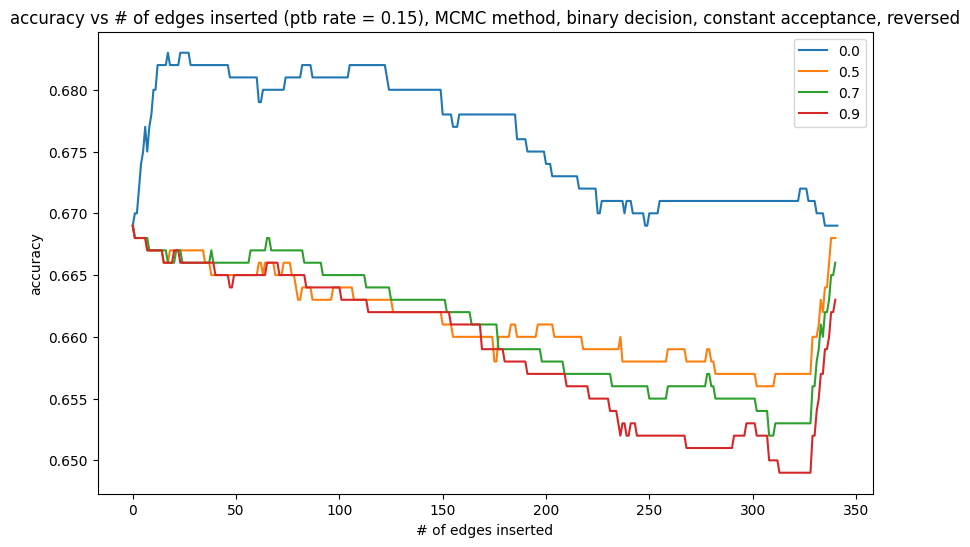

In [14]:
plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy", "reversed")

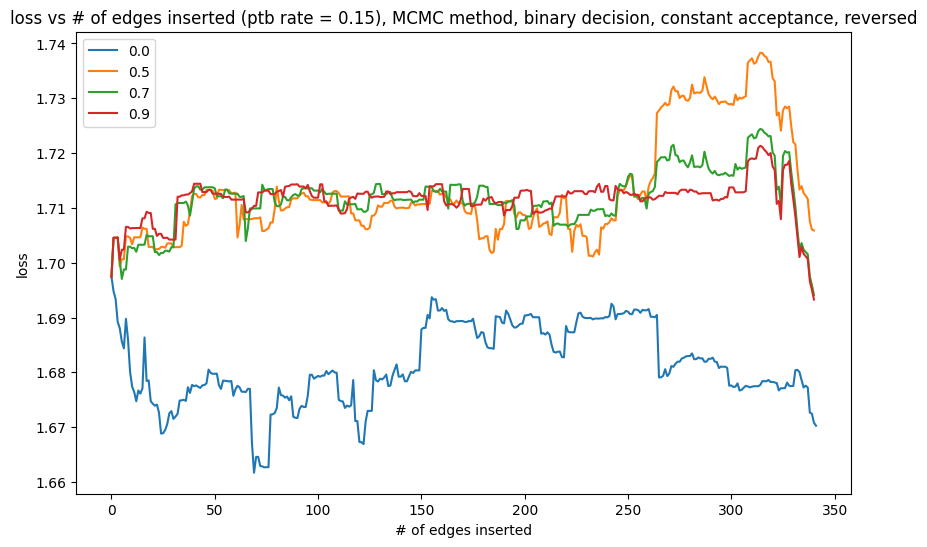

In [15]:
plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss", "reversed")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [16]:
split_dic_decreasing_acc = defaultdict(list)
itrs_two = defaultdict(int)
split_dic_decreasing_loss = defaultdict(list)

In [17]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 0.007116198539733887, master_dirty_delta: 0.007116436958312988
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 9.5367431640625e-06, master_dirty_delta: 9.5367431640625e-06
Attempt: 28, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: -0.0007110834121704102, master_dirty_delta: 0.0015475749969482422
Attempt: 29, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: -0.00016427040100097656, master_dirty_delta: 0.0014928579330444336
Attempt: 30, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.0015434026718139648, master_dirty_delta: 0.003802180290222168
Attempt: 31, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: -0.0002180337905883789, master_dirty_delta: 0.0020405054092407227
Attempt: 32, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: -0.0005244016647338867, master_di

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974281072616577, master_clean_delta: 0.007116436958312988, master_dirty_delta: 0.0071163177490234375
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.016974281072616577, master_clean_delta: 9.5367431640625e-06, master_dirty_delta: 9.655952453613281e-06
Attempt: 30, Selected: 10
max_change: 0.016974281072616577, master_clean_delta: 0.0003173351287841797, master_dirty_delta: 0.0004055500030517578
Attempt: 50, Selected: 20
max_change: 0.016974281072616577, master_clean_delta: -0.00029289722442626953, master_dirty_delta: 0.0005415678024291992
Attempt: 75, Selected: 30
max_change: 0.016974281072616577, master_clean_delta: 0.00011968612670898438, master_dirty_delta: 0.00010144710540771484
Attempt: 76, Selected: 30
max_change: 0.016974281072616577, master_clean_delta: 0.0015635490417480469, master_dirty_delta: 0.0015451908111572266
Attempt: 77, Selected: 30
max_change: 0.016974281072616577, master_clean_delta: -0.0002713203430175781, maste

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974281072616577, master_clean_delta: 0.00711667537689209, master_dirty_delta: 0.007116198539733887
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.016974281072616577, master_clean_delta: 9.5367431640625e-06, master_dirty_delta: 9.5367431640625e-06
Attempt: 30, Selected: 10
max_change: 0.016974281072616577, master_clean_delta: 0.0003159046173095703, master_dirty_delta: 0.0003249645233154297
Attempt: 52, Selected: 20
max_change: 0.016974281072616577, master_clean_delta: 0.0005702972412109375, master_dirty_delta: 0.0008599758148193359
Attempt: 68, Selected: 30
max_change: 0.016974281072616577, master_clean_delta: 0.0007590055465698242, master_dirty_delta: 0.001488804817199707
Attempt: 88, Selected: 40
max_change: 0.016974281072616577, master_clean_delta: 0.00045228004455566406, master_dirty_delta: 0.0011821985244750977
Attempt: 89, Selected: 40
max_change: 0.016974281072616577, master_clean_delta: 0.00045228004455566406, master_dirty_

In [18]:
record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GAT, Dataset.CITESEER, AcceptFn.INCREASING, SelectFn.BINARY, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gat"}_{"citeseer"}_{"increasing"}_{"binary"}_{"reversed"}_results.pkl')

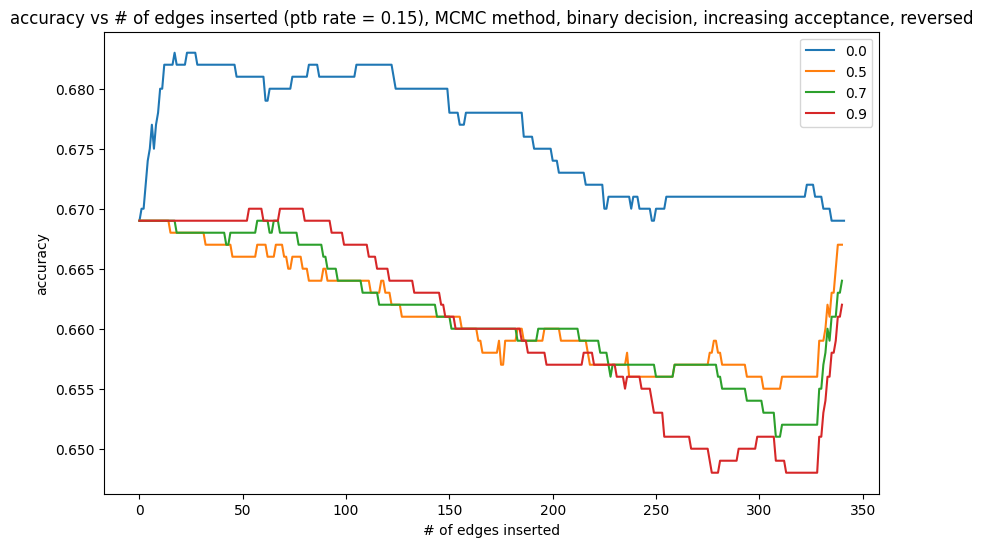

In [19]:
plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy", "reversed")

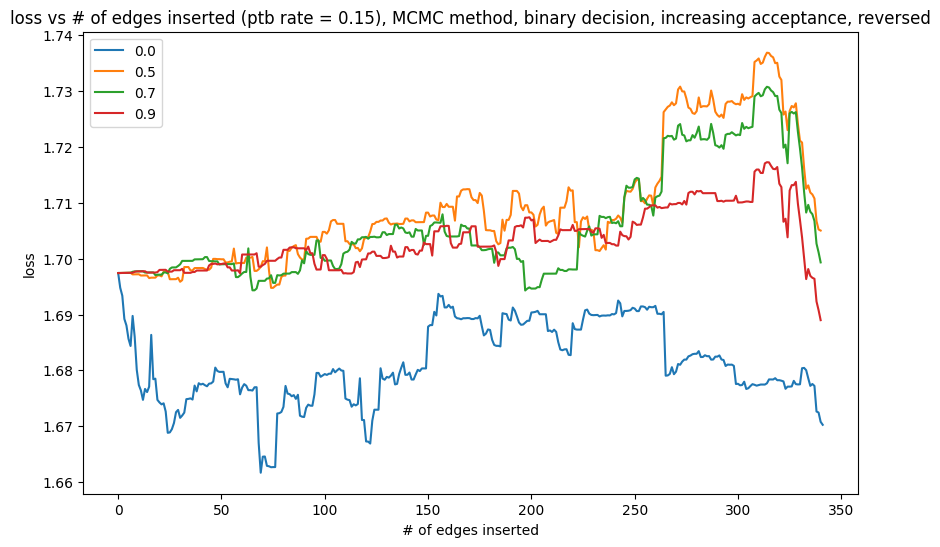

In [20]:
plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss", "reversed")

In [21]:
split_dic_decreasing_constant_acc = defaultdict(list)
split_dic_decreasing_constant_loss = defaultdict(list)
itrs_three = defaultdict(int)

In [22]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974281072616577, master_clean_delta: 0.00711667537689209, master_dirty_delta: 0.007116436958312988
Attempt: 22, Selected: 10
max_change: 0.016974281072616577, master_clean_delta: 0.007487177848815918, master_dirty_delta: 0.011824965476989746
Attempt: 51, Selected: 20
max_change: 0.016974281072616577, master_clean_delta: 0.009419441223144531, master_dirty_delta: 0.013746857643127441
Attempt: 52, Selected: 20
max_change: 0.016974281072616577, master_clean_delta: 0.010113954544067383, master_dirty_delta: 0.014207839965820312
Attempt: 53, Selected: 20
max_change: 0.016974281072616577, master_clean_delta: 0.010126948356628418, master_dirty_delta: 0.014220714569091797
Attempt: 76, Selected: 30
max_change: 0.016974281072616577, master_clean_delta: 0.017075538635253906, master_dirty_delta: 0.020581841468811035
Attempt: 77, Selected: 30
max_change: 0.016974281072616577, master_clean_delta: 0.016653776168823242, master_dirty_delta: 0.020160436630249023
At

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974281072616577, master_clean_delta: 0.00711667537689209, master_dirty_delta: 0.0071163177490234375
Attempt: 20, Selected: 10
max_change: 0.016974281072616577, master_clean_delta: 0.004850149154663086, master_dirty_delta: 0.01229250431060791
Attempt: 42, Selected: 20
max_change: 0.016974281072616577, master_clean_delta: 0.008322596549987793, master_dirty_delta: 0.01596999168395996
Attempt: 84, Selected: 30
max_change: 0.016974281072616577, master_clean_delta: 0.015319347381591797, master_dirty_delta: 0.01609623432159424
Attempt: 107, Selected: 40
max_change: 0.016974281072616577, master_clean_delta: 0.016357064247131348, master_dirty_delta: 0.018588781356811523
Attempt: 108, Selected: 40
max_change: 0.016974281072616577, master_clean_delta: 0.016361713409423828, master_dirty_delta: 0.018593192100524902
Attempt: 132, Selected: 50
max_change: 0.016974281072616577, master_clean_delta: 0.016335725784301758, master_dirty_delta: 0.019801020622253418
A

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 0.007116436958312988, master_dirty_delta: 0.0071163177490234375
Attempt: 21, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.010260224342346191, master_dirty_delta: 0.010260224342346191
Attempt: 22, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.012773990631103516, master_dirty_delta: 0.012774109840393066
Attempt: 54, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.01604175567626953, master_dirty_delta: 0.01634228229522705
Attempt: 55, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.016054391860961914, master_dirty_delta: 0.016355156898498535
Attempt: 88, Selected: 30
max_change: 0.016974283456802366, master_clean_delta: 0.015513062477111816, master_dirty_delta: 0.015851855278015137
Attempt: 118, Selected: 40
max_change: 0.016974283456802366, master_clean_delta: 0.013769030570983887, master_dirty_delta: 0.014635801315307617
A

In [23]:
record1 = Recording(split_dic_decreasing_constant_loss, split_dic_decreasing_constant_acc, itrs_three, Model.GAT, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gat"}_{"citeseer"}_{"constant"}_{"decaying"}_{"reversed"}_results.pkl')

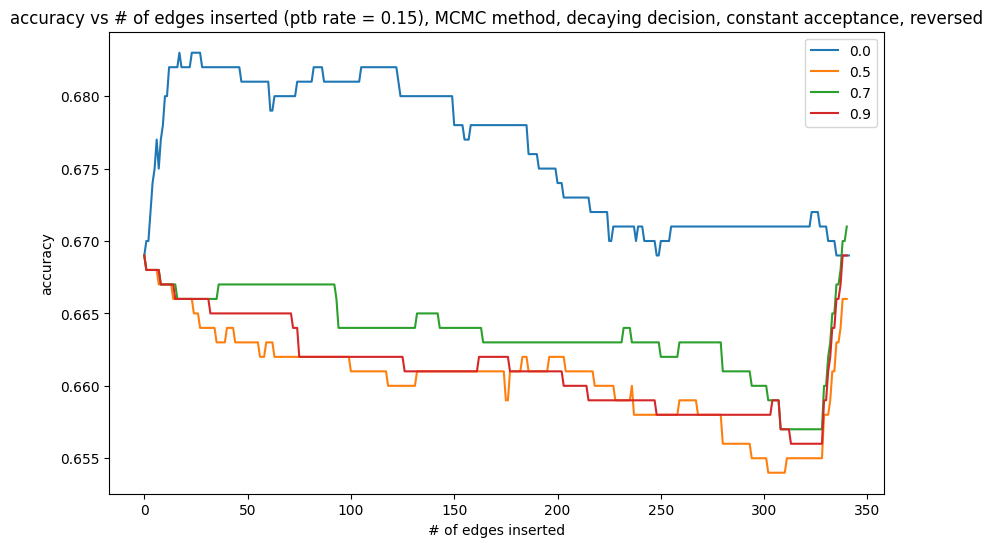

In [24]:
plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decaying", "constant", "accuracy", "reversed")

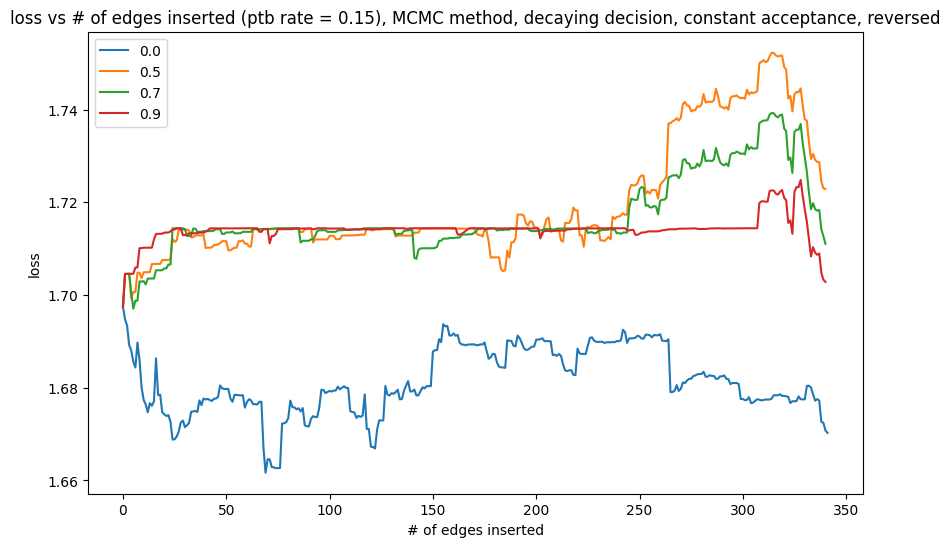

In [25]:
plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decaying", "constant", "loss", "reversed")

In [26]:
split_dic_decreasing_gradual_acc = defaultdict(list)
split_dic_decreasing_gradual_loss = defaultdict(list)
itrs_four = defaultdict(int)

In [27]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 0.007116436958312988, master_dirty_delta: 0.007116436958312988
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 9.5367431640625e-06, master_dirty_delta: 9.5367431640625e-06
Attempt: 39, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 7.855892181396484e-05, master_dirty_delta: 0.0027358531951904297
Attempt: 40, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: -0.00039458274841308594, master_dirty_delta: 0.0025402307510375977
Attempt: 41, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: -0.0026121139526367188, master_dirty_delta: 0.0022543668746948242
Attempt: 42, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: -4.470348358154297e-05, master_dirty_delta: 0.0023261308670043945
Attempt: 43, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.0001538991928100586, master_di

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974281072616577, master_clean_delta: 0.007116436958312988, master_dirty_delta: 0.0071163177490234375
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.016974281072616577, master_clean_delta: 9.775161743164062e-06, master_dirty_delta: 9.655952453613281e-06
Attempt: 30, Selected: 10
max_change: 0.016974281072616577, master_clean_delta: 0.0003159046173095703, master_dirty_delta: 0.00040435791015625
Attempt: 52, Selected: 20
max_change: 0.016974281072616577, master_clean_delta: 0.0004080533981323242, master_dirty_delta: 0.0009757280349731445
Attempt: 53, Selected: 20
max_change: 0.016974281072616577, master_clean_delta: 0.0008028745651245117, master_dirty_delta: 0.001370549201965332
Attempt: 100, Selected: 30
max_change: 0.016974281072616577, master_clean_delta: 0.001742243766784668, master_dirty_delta: 0.0017584562301635742
Attempt: 118, Selected: 40
max_change: 0.016974281072616577, master_clean_delta: -0.006762385368347168, master_dir

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 0.007116198539733887, master_dirty_delta: 0.0071163177490234375
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 9.298324584960938e-06, master_dirty_delta: 9.417533874511719e-06
Attempt: 29, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.0003170967102050781, master_dirty_delta: 0.00031685829162597656
Attempt: 64, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.001073598861694336, master_dirty_delta: 0.0016543865203857422
Attempt: 65, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.0010863542556762695, master_dirty_delta: 0.0016672611236572266
Attempt: 99, Selected: 30
max_change: 0.016974283456802366, master_clean_delta: 0.0013191699981689453, master_dirty_delta: 0.001453399658203125
Attempt: 100, Selected: 30
max_change: 0.016974283456802366, master_clean_delta: -0.0019388198852539062, master_

In [28]:
record1 = Recording(split_dic_decreasing_gradual_loss, split_dic_decreasing_gradual_acc, itrs_four, Model.GAT, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gat"}_{"citeseer"}_{"increasing"}_{"decaying"}_{"reversed"}_results.pkl')

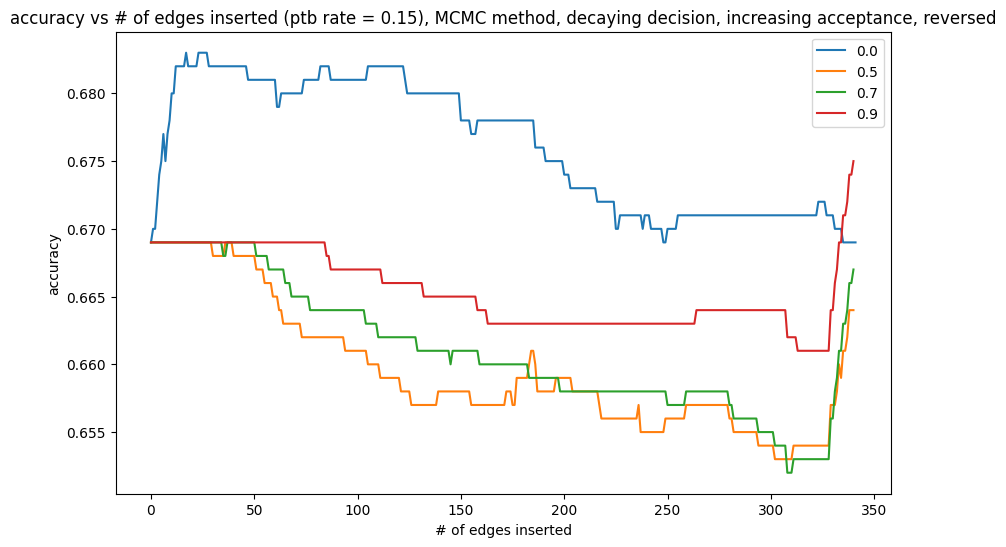

In [29]:
plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "reversed")

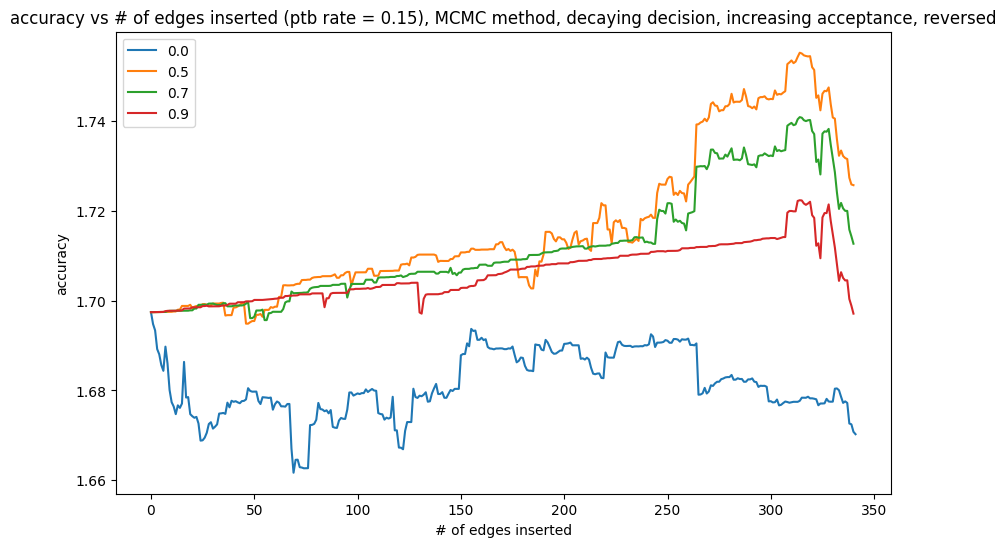

In [30]:
plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "reversed")

# regular, secondary attack, not reversed

In [31]:
splits = [0.0, 0.5, 0.7, 0.9]
# splits = [0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)
itrs_one = defaultdict(int)

In [32]:
for s in splits:
    if s == 0.0:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 0.007116436958312988, master_dirty_delta: 0.007116436958312988
Attempt: 21, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.00719606876373291, master_dirty_delta: 0.011405467987060547
Attempt: 37, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.004886984825134277, master_dirty_delta: 0.012676477432250977
Attempt: 53, Selected: 30
max_change: 0.016974283456802366, master_clean_delta: 0.005397796630859375, master_dirty_delta: 0.012697696685791016
Attempt: 71, Selected: 40
Attempt: 72, Selected: 40
max_change: 0.016974283456802366, master_clean_delta: 0.014844417572021484, master_dirty_delta: 0.02039480209350586
Attempt: 87, Selected: 50
max_change: 0.016974283456802366, master_clean_delta: 0.013935327529907227, master_dirty_delta: 0.019508719444274902
Attempt: 101, Selected: 60
max_change: 0.016974283456802366, master_clean_delta: 0.0152970552444458, master_dirty_delta:

Peturbing graph...:   0%|          | 0/176 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974281072616577, master_clean_delta: 0.007116436958312988, master_dirty_delta: 0.0071163177490234375
Attempt: 19, Selected: 10
max_change: 0.016974281072616577, master_clean_delta: 0.005276083946228027, master_dirty_delta: 0.011910200119018555
Attempt: 34, Selected: 20
max_change: 0.016974281072616577, master_clean_delta: 0.004517316818237305, master_dirty_delta: 0.014859676361083984
Attempt: 49, Selected: 30
max_change: 0.016974281072616577, master_clean_delta: 0.0053958892822265625, master_dirty_delta: 0.014974236488342285
Attempt: 63, Selected: 40
max_change: 0.016974281072616577, master_clean_delta: 0.012561202049255371, master_dirty_delta: 0.015256881713867188
Attempt: 81, Selected: 50
max_change: 0.016974281072616577, master_clean_delta: 0.013252735137939453, master_dirty_delta: 0.01577138900756836
Attempt: 82, Selected: 50
max_change: 0.016974281072616577, master_clean_delta: 0.015672683715820312, master_dirty_delta: 0.01819133758544922
A

Peturbing graph...:   0%|          | 0/107 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 0.007116436958312988, master_dirty_delta: 0.007116436958312988
Attempt: 20, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.00756227970123291, master_dirty_delta: 0.00756227970123291
Attempt: 21, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.008886337280273438, master_dirty_delta: 0.008886337280273438
Attempt: 35, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.007456302642822266, master_dirty_delta: 0.007463574409484863
Attempt: 50, Selected: 30
max_change: 0.016974283456802366, master_clean_delta: 0.015744924545288086, master_dirty_delta: 0.01563405990600586
Attempt: 82, Selected: 40
max_change: 0.016974283456802366, master_clean_delta: 0.015538692474365234, master_dirty_delta: 0.01542818546295166
Attempt: 83, Selected: 40
max_change: 0.016974283456802366, master_clean_delta: 0.016964197158813477, master_dirty_delta: 0.016853809356689453
Attem

Peturbing graph...:   0%|          | 0/36 [00:00<?, ?it/s]

In [33]:
record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GAT, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.BINARY, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gat"}_{"citeseer"}_{"constant"}_{"binary"}_{"attacked"}_results.pkl')

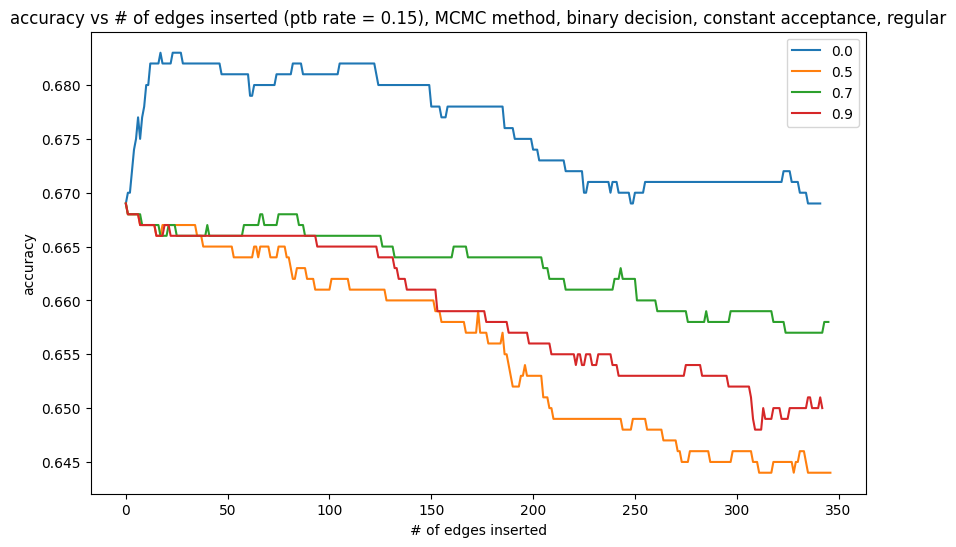

In [34]:
plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy", "regular")

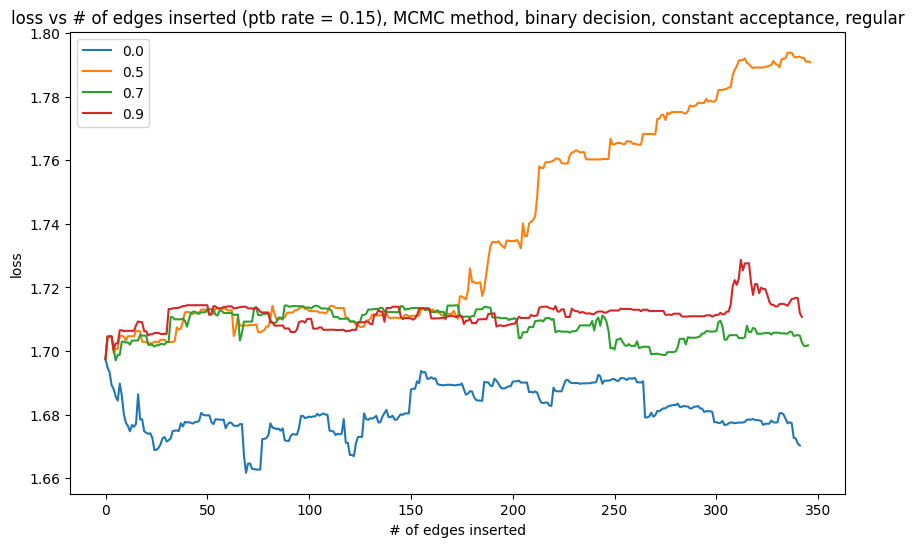

In [35]:
plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss", "regular")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [36]:
split_dic_decreasing_acc = defaultdict(list)
itrs_two = defaultdict(int)
split_dic_decreasing_loss = defaultdict(list)

In [37]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 0.007116436958312988, master_dirty_delta: 0.007116436958312988
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 9.5367431640625e-06, master_dirty_delta: 9.5367431640625e-06
Attempt: 28, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: -0.0007110834121704102, master_dirty_delta: 0.0015475749969482422
Attempt: 29, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: -0.00016427040100097656, master_dirty_delta: 0.0014928579330444336
Attempt: 30, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.0015434026718139648, master_dirty_delta: 0.003802180290222168
Attempt: 31, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: -0.0002180337905883789, master_dirty_delta: 0.0020405054092407227
Attempt: 32, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: -0.0005244016647338867, master_di

Peturbing graph...:   0%|          | 0/176 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 0.007116436958312988, master_dirty_delta: 0.0071163177490234375
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 9.5367431640625e-06, master_dirty_delta: 9.655952453613281e-06
Attempt: 30, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.00031566619873046875, master_dirty_delta: 0.00040435791015625
Attempt: 48, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: -0.0022546052932739258, master_dirty_delta: -0.00013697147369384766
Attempt: 49, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: -0.0004917383193969727, master_dirty_delta: 0.00023627281188964844
Attempt: 50, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: -0.0002931356430053711, master_dirty_delta: 0.00043511390686035156
Attempt: 67, Selected: 30
max_change: 0.016974283456802366, master_clean_delta: 0.0009969472885131836, mast

Peturbing graph...:   0%|          | 0/107 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 0.007116436958312988, master_dirty_delta: 0.007116436958312988
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 9.5367431640625e-06, master_dirty_delta: 9.655952453613281e-06
Attempt: 29, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.0003170967102050781, master_dirty_delta: 0.0003170967102050781
Attempt: 51, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.0004144906997680664, master_dirty_delta: 0.0006955862045288086
Attempt: 52, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.0005705356597900391, master_dirty_delta: 0.0005164146423339844
Attempt: 53, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.0005700588226318359, master_dirty_delta: 0.0008510351181030273
Attempt: 67, Selected: 30
max_change: 0.016974283456802366, master_clean_delta: 0.005130290985107422, master_dirty

Peturbing graph...:   0%|          | 0/36 [00:00<?, ?it/s]

In [38]:
record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GAT, Dataset.CITESEER, AcceptFn.INCREASING, SelectFn.BINARY, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gat"}_{"citeseer"}_{"increasing"}_{"binary"}_{"attacked"}_results.pkl')

In [ ]:
plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy", "regular")

In [ ]:
plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss", "regular")

In [ ]:
split_dic_decreasing_constant_acc = defaultdict(list)
split_dic_decreasing_constant_loss = defaultdict(list)
itrs_three = defaultdict(int)

In [42]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 0.007116436958312988, master_dirty_delta: 0.007116436958312988
Attempt: 22, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.007486939430236816, master_dirty_delta: 0.011824727058410645
Attempt: 51, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.00941920280456543, master_dirty_delta: 0.013746857643127441
Attempt: 52, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.010113716125488281, master_dirty_delta: 0.014207839965820312
Attempt: 53, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.010126709938049316, master_dirty_delta: 0.014220714569091797
Attempt: 84, Selected: 30
max_change: 0.016974283456802366, master_clean_delta: 0.01649010181427002, master_dirty_delta: 0.019931316375732422
Attempt: 108, Selected: 40
max_change: 0.016974283456802366, master_clean_delta: 0.01279306411743164, master_dirty_delta: 0.019771337509155273
Att

Peturbing graph...:   0%|          | 0/176 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974281072616577, master_clean_delta: 0.00711667537689209, master_dirty_delta: 0.0071163177490234375
Attempt: 20, Selected: 10
max_change: 0.016974281072616577, master_clean_delta: 0.004850149154663086, master_dirty_delta: 0.01229250431060791
Attempt: 42, Selected: 20
max_change: 0.016974281072616577, master_clean_delta: 0.008322596549987793, master_dirty_delta: 0.01596999168395996
Attempt: 84, Selected: 30
max_change: 0.016974281072616577, master_clean_delta: 0.015319347381591797, master_dirty_delta: 0.01609635353088379
Attempt: 107, Selected: 40
max_change: 0.016974281072616577, master_clean_delta: 0.016357064247131348, master_dirty_delta: 0.018588781356811523
Attempt: 108, Selected: 40
max_change: 0.016974281072616577, master_clean_delta: 0.016361713409423828, master_dirty_delta: 0.018593192100524902
Attempt: 132, Selected: 50
max_change: 0.016974281072616577, master_clean_delta: 0.016335725784301758, master_dirty_delta: 0.019801020622253418
A

Peturbing graph...:   0%|          | 0/107 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 0.007116436958312988, master_dirty_delta: 0.007116436958312988
Attempt: 50, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.022220611572265625, master_dirty_delta: 0.022242069244384766
Attempt: 51, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.01574099063873291, master_dirty_delta: 0.01605391502380371
Attempt: 84, Selected: 30
max_change: 0.016974283456802366, master_clean_delta: 0.014904975891113281, master_dirty_delta: 0.015086889266967773
Attempt: 110, Selected: 40
max_change: 0.016974283456802366, master_clean_delta: 0.01620328426361084, master_dirty_delta: 0.01681387424468994
Attempt: 111, Selected: 40
max_change: 0.016974283456802366, master_clean_delta: 0.016201496124267578, master_dirty_delta: 0.016911864280700684
Attempt: 112, Selected: 40
max_change: 0.016974283456802366, master_clean_delta: 0.01620161533355713, master_dirty_delta: 0.016912221908569336
Att

Peturbing graph...:   0%|          | 0/36 [00:00<?, ?it/s]

In [43]:
record1 = Recording(split_dic_decreasing_constant_loss, split_dic_decreasing_constant_acc, itrs_three, Model.GAT, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gat"}_{"citeseer"}_{"constant"}_{"decaying"}_{"attacked"}_results.pkl')

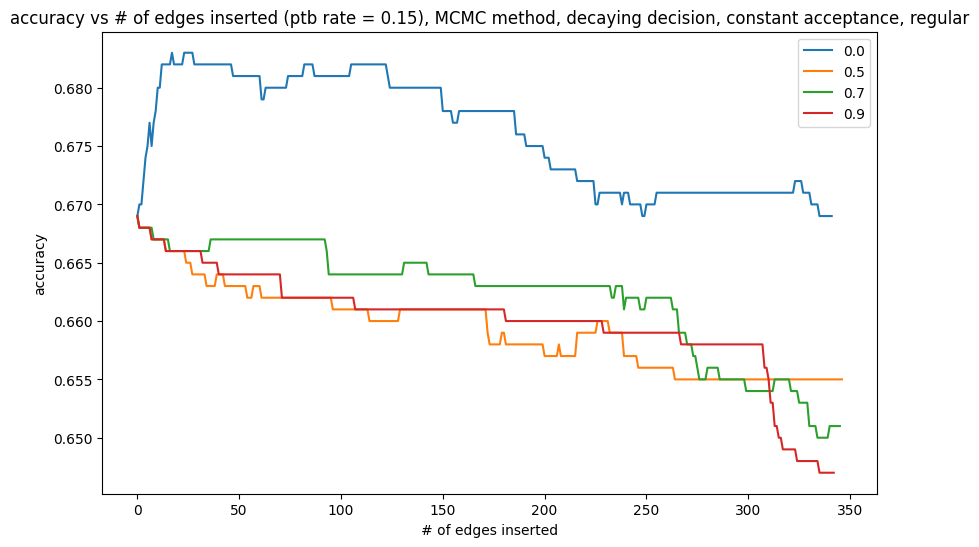

In [44]:
plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decaying", "constant", "accuracy", "regular")

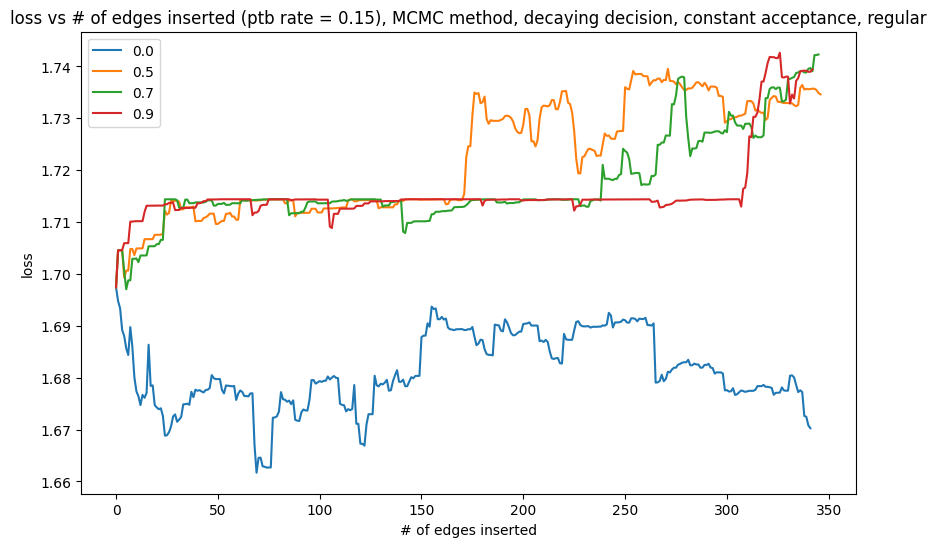

In [45]:
plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decaying", "constant", "loss", "regular")

In [46]:
split_dic_decreasing_gradual_acc = defaultdict(list)
split_dic_decreasing_gradual_loss = defaultdict(list)
itrs_four = defaultdict(int)

In [ ]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 0.007116436958312988, master_dirty_delta: 0.007116436958312988
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 9.5367431640625e-06, master_dirty_delta: 9.5367431640625e-06
Attempt: 39, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 7.855892181396484e-05, master_dirty_delta: 0.0027358531951904297
Attempt: 40, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: -0.00039458274841308594, master_dirty_delta: 0.0025402307510375977
Attempt: 41, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: -0.0026121139526367188, master_dirty_delta: 0.0022541284561157227
Attempt: 42, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: -4.4465065002441406e-05, master_dirty_delta: 0.0023261308670043945
Attempt: 43, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.0001538991928100586, master_d

Peturbing graph...:   0%|          | 0/176 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 0.007116436958312988, master_dirty_delta: 0.0071163177490234375
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.016974283456802366, master_clean_delta: 9.5367431640625e-06, master_dirty_delta: 9.5367431640625e-06
Attempt: 30, Selected: 10
max_change: 0.016974283456802366, master_clean_delta: 0.00031685829162597656, master_dirty_delta: 0.0004055500030517578
Attempt: 63, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.0010607242584228516, master_dirty_delta: 0.0016285181045532227
Attempt: 64, Selected: 20
max_change: 0.016974283456802366, master_clean_delta: 0.001073598861694336, master_dirty_delta: 0.001641392707824707
Attempt: 97, Selected: 30
max_change: 0.016974283456802366, master_clean_delta: 0.0018000602722167969, master_dirty_delta: 0.0022743940353393555
Attempt: 127, Selected: 40
max_change: 0.016974283456802366, master_clean_delta: 0.0011821985244750977, master_dirty

Peturbing graph...:   0%|          | 0/107 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.016974281072616577, master_clean_delta: 0.00711667537689209, master_dirty_delta: 0.0071163177490234375
Attempt: 1, Selected: 0
Attempt: 2, Selected: 0
max_change: 0.016974281072616577, master_clean_delta: 9.5367431640625e-06, master_dirty_delta: 9.5367431640625e-06
Attempt: 30, Selected: 10
max_change: 0.016974281072616577, master_clean_delta: 0.0003159046173095703, master_dirty_delta: 0.0003249645233154297
Attempt: 63, Selected: 20
max_change: 0.016974281072616577, master_clean_delta: 0.0010528564453125, master_dirty_delta: 0.001640915870666504
Attempt: 64, Selected: 20
max_change: 0.016974281072616577, master_clean_delta: 0.0010657310485839844, master_dirty_delta: 0.0016537904739379883
Attempt: 98, Selected: 30
max_change: 0.016974281072616577, master_clean_delta: 0.0012880563735961914, master_dirty_delta: 0.0017452239990234375
Attempt: 128, Selected: 40
max_change: 0.016974281072616577, master_clean_delta: 0.0012260675430297852, master_dirty_del

In [ ]:
record1 = Recording(split_dic_decreasing_gradual_loss, split_dic_decreasing_gradual_acc, itrs_four, Model.GAT, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gat"}_{"citeseer"}_{"increasing"}_{"decaying"}_{"attacked"}_results.pkl')

In [ ]:
plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "regular")

In [ ]:
plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "regular")